In [1]:
%matplotlib inline
import numpy as np
import poisson_tools as pt
import matplotlib.pyplot as plt
from scipy.special import expit

In [2]:
train_x, train_y = pt.get_train_data()
train_x = train_x > 50

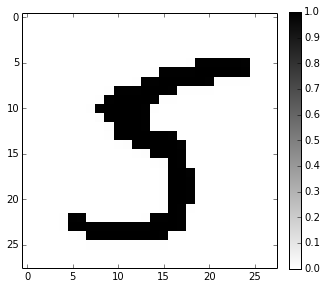

In [3]:
pt.plot_digit(train_x[59997])
plt.savefig('test.pdf')

In [4]:
digit = 5
label_list = np.array(train_y).astype(int)
index_digit = np.where(label_list==digit)[0]
train_num = len(index_digit)-1
index_train = index_digit[0:train_num]
Data_v = np.array(train_x[index_train]).astype(float)

# Initialisation of W, a and b

In [5]:
hiden_num = 500
W = np.random.normal(0,0.01,Data_v.shape[1]*hiden_num)
W = W.reshape((Data_v.shape[1],hiden_num))
b = np.zeros(hiden_num)
pixel_on = np.sum(Data_v,0)
a = np.log((pixel_on + 0.01)/(train_num - pixel_on + 0.01))
eta = 0.001

# Given V0, get (v0, h0) and (v1, h1)

In [6]:
def sigmoid_sampling(data, weight, bias):
    sum_data = np.dot(data, weight) + bias
    prob = expit(sum_data)
    rdm = np.random.random(prob.shape)
    index_on = rdm < prob
    samples = np.zeros(prob.shape)
    samples[index_on]=1.
    return samples
    

In [8]:
def update_para(v0, h0, v1, h1, a, b, w, eta ):
    delta_a = np.zeros(v0.shape)
    delta_b = np.zeros(h0.shape)
    delta_w = np.zeros(w.shape)
    batch_size = v0.shape[0]
    
    delta_a = eta * (v0 - v1)
    delta_b = eta * (h0 - h1)
    for k in range(batch_size):
        v0_matrix = np.transpose(np.tile(v0[k],(w.shape[1],1)))
        v1_matrix = np.transpose(np.tile(v1[k],(w.shape[1],1)))
        h0_matrix = np.tile(h0[k],(w.shape[0],1))
        h1_matrix = np.tile(h1[k],(w.shape[0],1))
        delta_w += eta * (v0_matrix*h0_matrix - v1_matrix*h1_matrix)
    
    a += np.average(delta_a,0)
    b += np.average(delta_b,0)
    w += delta_w/np.float(batch_size)
    return a, b, w

In [9]:
batch_size = 1
for iteration in range(1):
    for k in range(0,train_num,batch_size):
        data_v = Data_v[k:k+batch_size]
        data_h = sigmoid_sampling(data_v, W, b)
        gibbs_v = sigmoid_sampling(data_h, W.transpose(), a)
        gibbs_h = sigmoid_sampling(gibbs_v, W, b)
        a, b, W = update_para(data_v, data_h, gibbs_v, gibbs_h, a, b, W, eta)

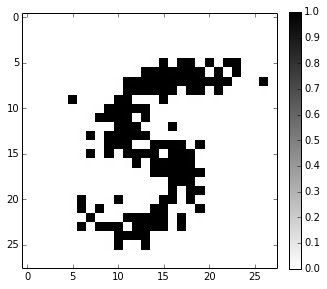

In [12]:
np.random.seed(0)
data_v = np.array(train_x[index_digit[train_num]]).astype(float)
data_h = sigmoid_sampling(data_v, W, b)
recon = sigmoid_sampling(data_h, W.transpose(), a)
pt.plot_digit(recon)